In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import json
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import seaborn as sns

Carregando modelo

In [44]:
modelo = tf.keras.models.load_model('(0.1.3)modelo.keras')

In [45]:
lines = os.listdir('hcl_data/lines')

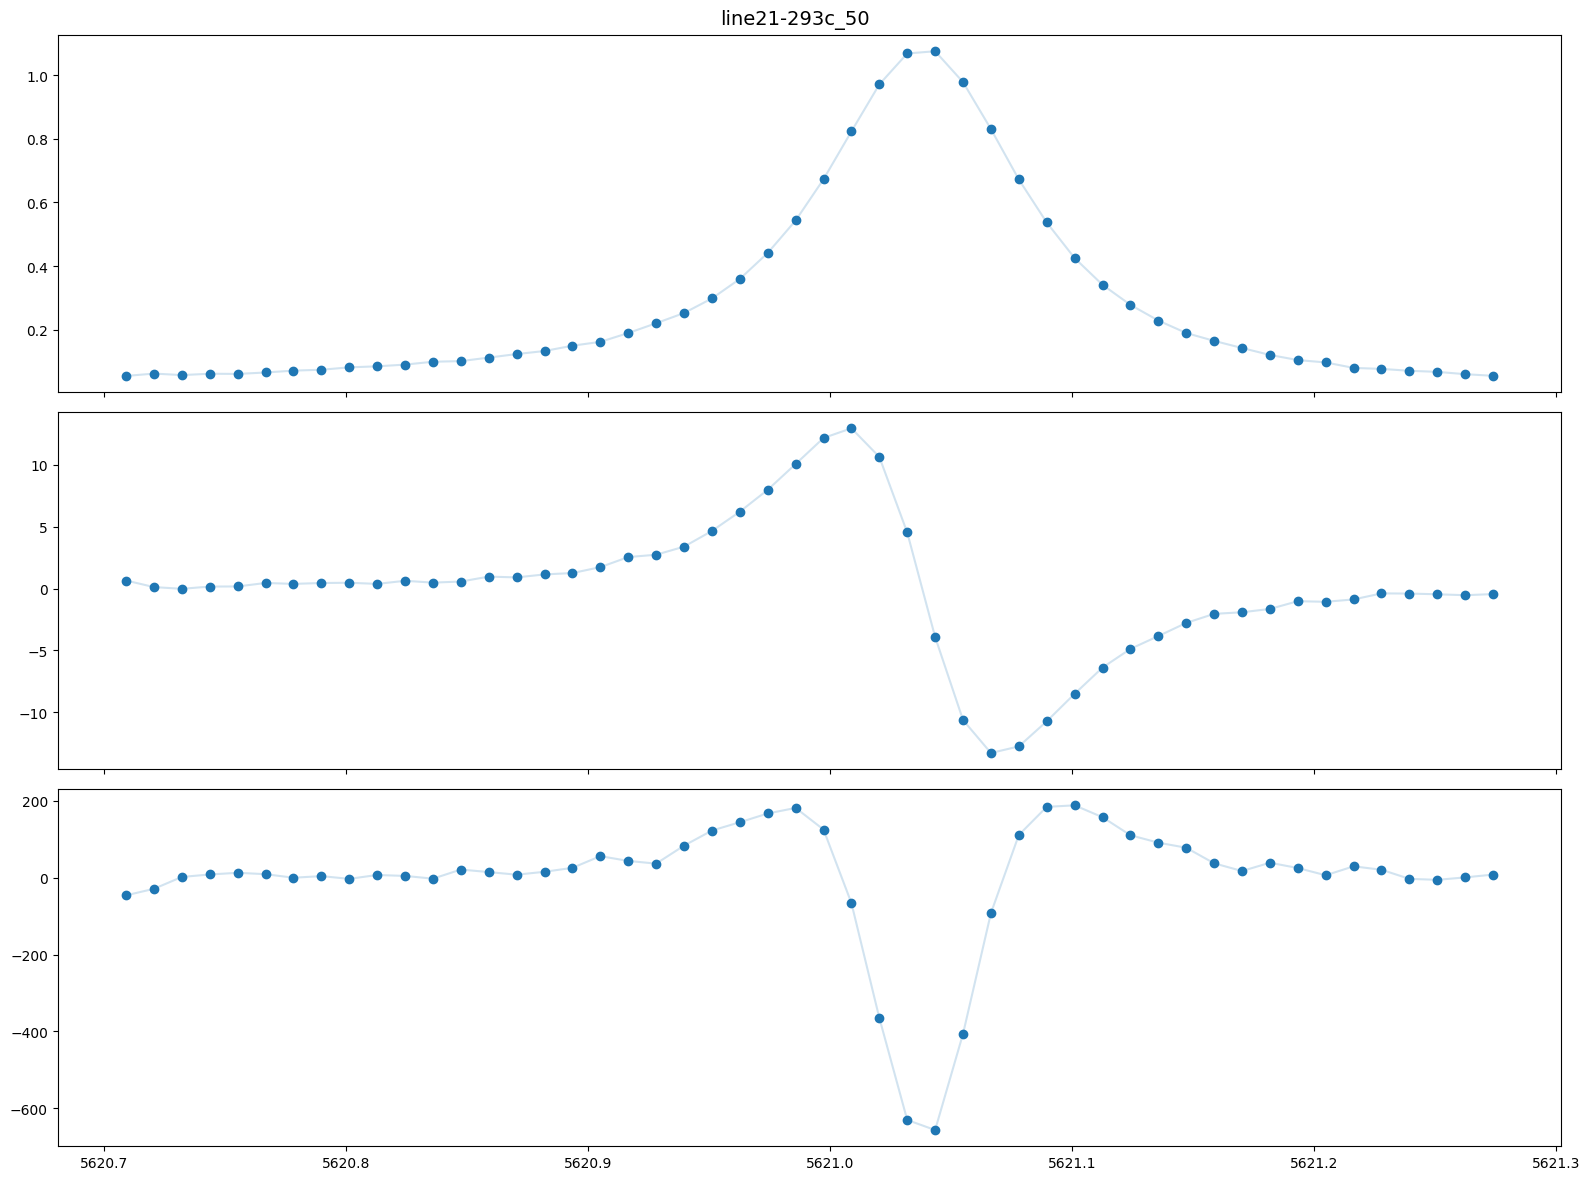

In [46]:
data = np.random.choice(lines)
with open(f'hcl_data/lines/{data}','r') as json_file:
    file = json.load(json_file)


wavenumber = file['x']
line = file['y']
d1 = file['primeira_derivada']
d2 = file['segunda_derivada']

fig , ax = plt.subplots(3,1,tight_layout=True,sharex=True, figsize=(16,12))

fig.suptitle(data.split('_')[0]+f'_{len(line)}',size=14)
ax[0].scatter(x=wavenumber,y= line)
ax[0].plot(wavenumber,line,alpha=0.2)
ax[1].scatter(x=wavenumber,y= d1)
ax[1].plot(wavenumber,d1,alpha=0.2)
ax[2].scatter(x=wavenumber,y= d2)
ax[2].plot(wavenumber,d2,alpha=0.2)

In [47]:

X = []
y = []
stats = []
for arq in lines:
    with open(f'hcl_data/lines/{arq}','r') as file:
        d = json.load(file)

    try:
        stats.append(list(d['statistics'].values()))
        s =  np.array(d['y']).reshape((50,1))
        d1 = np.array(d['primeira_derivada']).reshape((50,1))
        d2 = np.array(d['segunda_derivada']).reshape((50,1))
        X.append(np.concatenate([s,d1,d2],axis=1).reshape((50,3)))
        y.append(d['fwhm'])
    except:
        pass            


X = tf.convert_to_tensor(X)
y = tf.convert_to_tensor(y)
stats = tf.convert_to_tensor(stats)

In [48]:
predito = modelo.predict([X,stats])

type_pred = np.array(list(map(lambda x: np.argmax(x), predito[0])))
fwhm_pred = np.array(list(map(lambda x: x[0], predito[1])))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [49]:
type_pred

array([1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
print(mean_absolute_error(y,fwhm_pred))
px.scatter(x = y, y=fwhm_pred)

0.5905656


In [51]:
lines = pd.read_csv('hcl_data/line_features.csv')

In [52]:
arqs_train = os.listdir('../scr/train')

larguras_treino = []
for arq in arqs_train:
    with open(f'../scr/train/{arq}','r') as file:
        d = json.load(file)

    larguras_treino.append(d['fwhm'])

larguras_treino = pd.Series(larguras_treino)

In [53]:
lines['fwhm'].describe()

count    421.000000
mean       0.103158
std        0.073857
min        0.018190
25%        0.059206
50%        0.080513
75%        0.124613
max        0.465409
Name: fwhm, dtype: float64

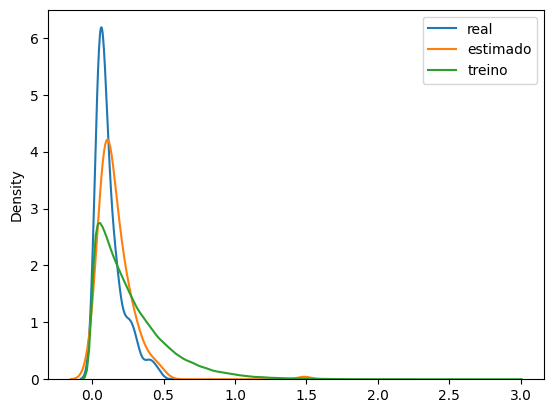

In [54]:
sns.kdeplot(x = y,label='real')
sns.kdeplot(x = fwhm_pred[fwhm_pred<5],label='estimado')
sns.kdeplot(x = larguras_treino,label='treino')
plt.legend()

0.1021190432827388


<AxesSubplot: ylabel='Density'>

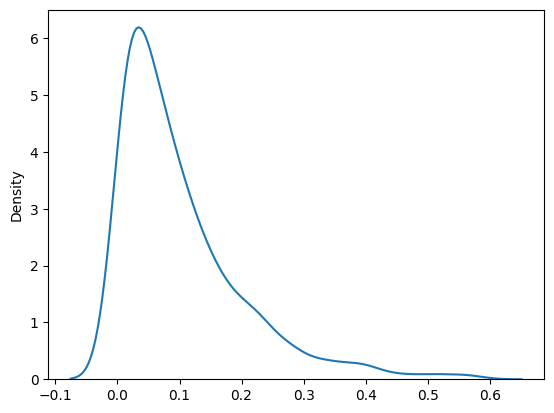

In [55]:
y= np.random.exponential(0.1,1000)
print(np.mean(y))
sns.kdeplot(x = y)

In [56]:
larguras_treino.describe()

count    1.800000e+05
mean     2.728823e-01
std      2.510298e-01
min      1.862137e-07
25%      8.835044e-02
50%      2.021111e-01
75%      3.835097e-01
max      2.938104e+00
dtype: float64